In [1]:
%matplotlib inline
%env OMP_NUM_THREADS=10 
%pylab inline 
%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = [12, 12]

env: OMP_NUM_THREADS=10
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append("../utils")

from utils_3d import *
from sfm import *

import copy

# load data 

In [3]:
sfm3view = Sfm3view(np.eye(3),np.zeros(3))

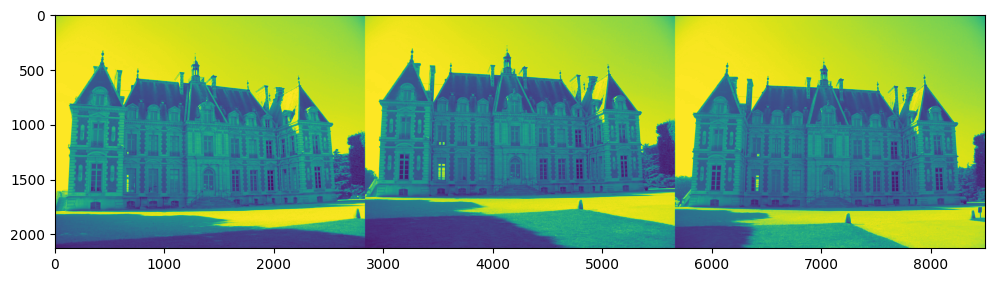

In [4]:
imshow(np.hstack([sfm3view.views[0].im_gray,sfm3view.views[1].im_gray,sfm3view.views[2].im_gray]))

# matching sift

In [5]:
# key point detect view0 and view1
sfm3view.detectKeyPoints(0)
sfm3view.detectKeyPoints(1)

In [6]:
# matching keypoint between view1 and view2
match_pair = sfm3view.matching2views(0,1)
print(len(match_pair))
print(len(sfm3view.match_manage_table))

# compute essential matrix by ransac epipolar
sfm3view.solveEpipolarEqToGetTranslation_2views(0,1)
print(len(sfm3view.match_manage_table))

Create New matching table
1540
1540
1540
1540


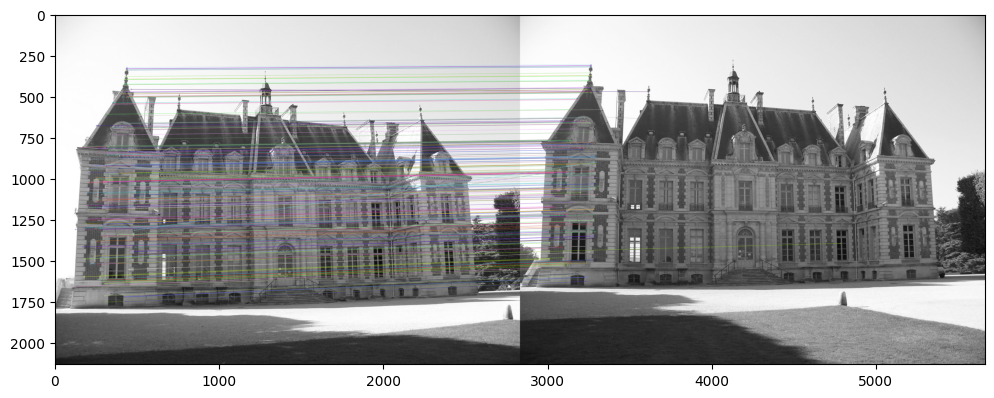

In [7]:
work = sfm3view
img_good_matches_inliers = cv2.drawMatches(work.views[0].im_gray,work.views[0].key_point_uvs,work.views[1].im_gray,work.views[1].key_point_uvs,match_pair[:200],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
imshow(img_good_matches_inliers)

# Extract R ,t by Fundamental matrix and K
* F = K^(-T)EK^(-1)
* E = K^(T)FK
* E= [t]xR

In [8]:
w_v1Pv2,v2Rv1,v1Lmks,inlier_mask = sfm3view.decomposeE2Rt_and_calc_Xs_wrt_v1(0,1)

(1452, 2)
candidate idx:1
inlier mask len: (1452,)
match manage table shape: 1540


# view

(124.07260745316292, 1560.2722981181967) [ 124 1542]
(168.2823883963707, 1341.809888689106) [ 167 1324]
(168.93604354869368, 782.3895136062595) [165 766]
(169.87738876309936, 786.2249385099257) [166 770]
(175.39701297296128, 1506.4048413788837) [ 175 1488]
(179.92690125914646, 1407.9721908519969) [ 179 1390]
(179.92690125914646, 1407.9721908519969) [ 179 1390]
(185.83355076286702, 1234.5070978683386) [ 184 1217]
(187.0020540856303, 1212.9863692178394) [ 185 1195]
(191.83627555267984, 1244.0651622556056) [ 190 1226]
(191.83627555267984, 1244.0651622556056) [ 190 1226]
(194.4280877887541, 1113.1801305039876) [ 192 1096]
(195.3862006925381, 906.7379971861532) [192 890]
(195.75680312059956, 1040.9202455686145) [ 193 1024]
(195.95994270635273, 1211.59122779168) [ 194 1194]
(196.8840981102217, 1024.1835111714915) [ 194 1007]
(199.04428733761668, 1187.2217609823483) [ 197 1170]
(200.03872386888148, 976.7335191240326) [197 960]
(202.258740385335, 930.7283316541173) [199 914]
(202.8650709389360

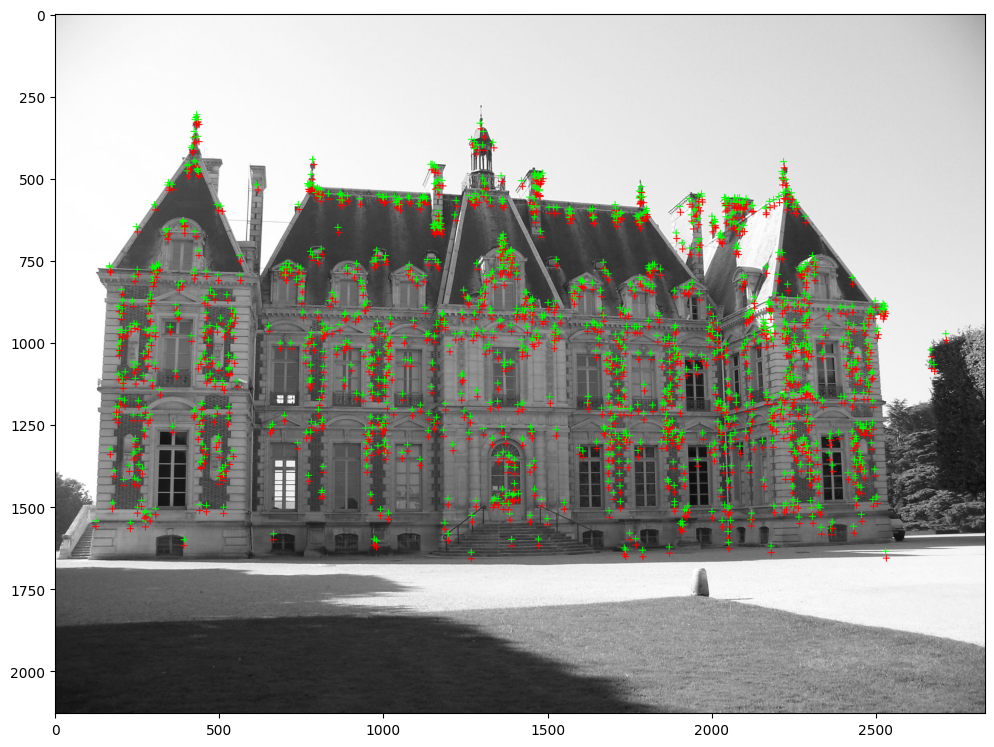

In [9]:
pts1,pts2,_ = sfm3view.get2D_2Dcoresspondance(0,1,True)
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

canvas = copy.deepcopy(sfm3view.views[1].im_gray)
canvas = cv2.cvtColor(canvas,cv2.COLOR_GRAY2RGB)

for p,v1Lmk in zip(pts2,v1Lmks):
    cv2.drawMarker(canvas,
                position=p,
                color=(0, 255, 0),
                markerType=cv2.MARKER_CROSS,
                markerSize=20,
                thickness=2,
                line_type=cv2.LINE_4
                )
    
    XX = sfm3view.K.dot(v2Rv1.dot(v1Lmk-w_v1Pv2))
    u = XX[0]/XX[2]
    v = XX[1]/XX[2]
    
    cv2.drawMarker(canvas,
                position=(int(u),int(v)),
                color=(255, 0, 0),
                markerType=cv2.MARKER_CROSS,
                markerSize=20,
                thickness=2,
                line_type=cv2.LINE_4
                )
    
    if 0 < u < canvas.shape[0] and 0 < v < canvas.shape[1]:
        print((u,v),p)

imshow(canvas)

# Third View PNP

In [10]:
# matching v1 and v2
sfm3view.detectKeyPoints(2)
v2_v3_match_pair = sfm3view.matching2views(1,2)

New 1330 points are added.


In [11]:
wPv3,wRv3 = sfm3view.solvePNPToGetToGetTranslation_V2andV3(1,2)

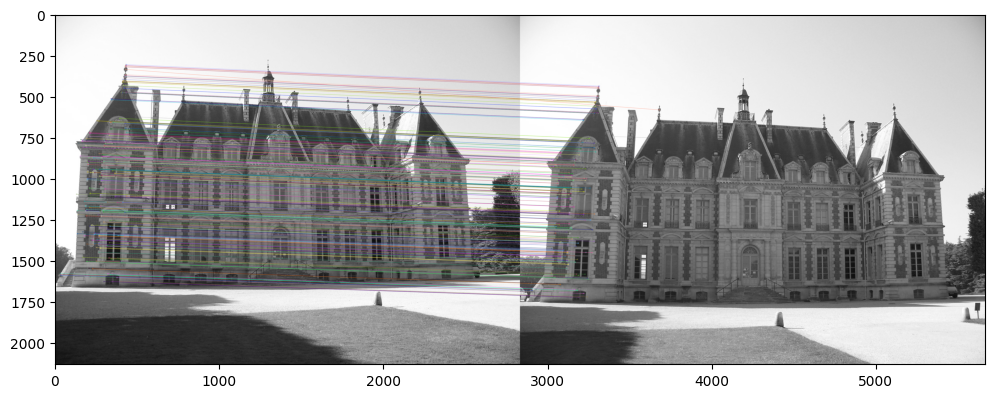

In [12]:
img_good_matches_inliers = cv2.drawMatches(sfm3view.views[1].im_gray,sfm3view.views[1].key_point_uvs,sfm3view.views[2].im_gray,sfm3view.views[2].key_point_uvs,v2_v3_match_pair[:200],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
imshow(img_good_matches_inliers)

(192.92915394436022, 1425.7014030761309) [ 192 1425]
(214.67972457029606, 1300.959952088883) [ 212 1300]
(217.4408784673094, 1331.0377091799003) [ 216 1331]
(217.4408784673094, 1331.0377091799003) [ 216 1331]
(222.5397264968343, 1299.6067217382215) [ 221 1299]
(228.42841876083153, 1118.5471541135219) [ 224 1118]
(235.90445590401916, 1028.4833784469376) [ 230 1028]
(236.08617369943724, 1230.6414704883423) [ 232 1230]
(236.11507129035877, 1215.408471581256) [ 232 1215]
(241.59747683143024, 1011.2771520855702) [ 236 1010]
(243.88197613604342, 987.2647315891904) [237 987]
(239.9472350303978, 1281.911915804871) [ 237 1281]
(244.2817333257569, 1198.231249669957) [ 240 1197]
(249.51950302319506, 1076.6833601922704) [ 245 1076]
(245.27902051707335, 1475.0633542629364) [ 246 1474]
(244.38997566083268, 1645.1949492075819) [ 245 1644]
(259.669793391807, 1440.8121175233662) [ 259 1441]
(268.6413347618489, 1168.8929399023755) [ 265 1168]
(268.6413347618489, 1168.8929399023755) [ 265 1168]
(269.9880

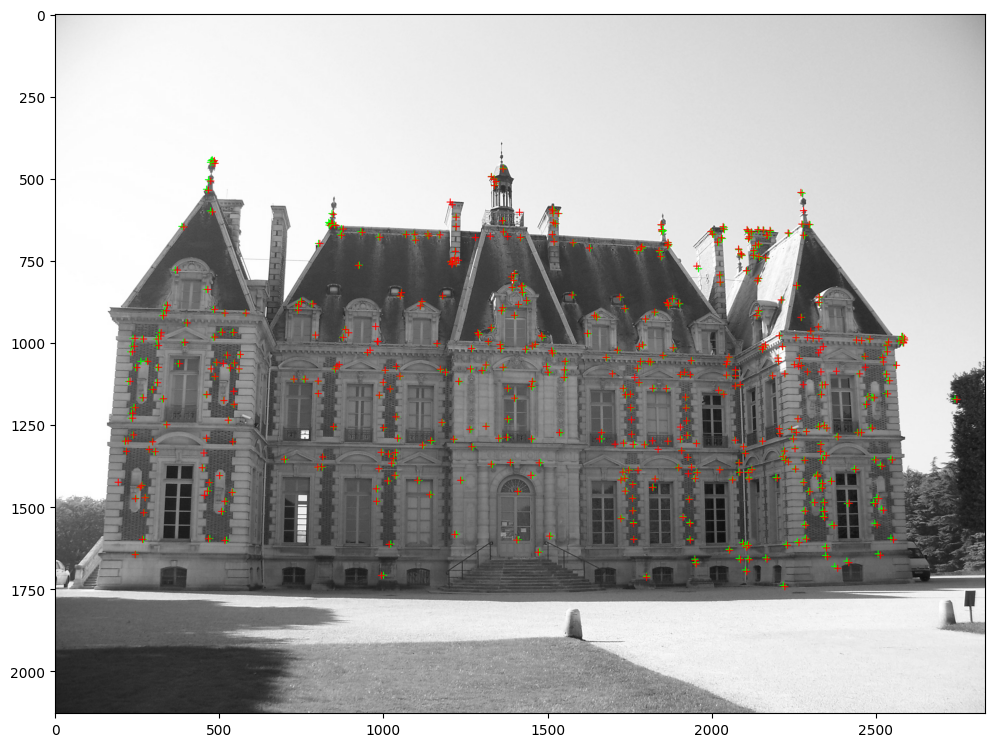

In [13]:
pts2,wLmks,_ = sfm3view.get2D_3Dcoresspondance(1,2,True)
pts2 = np.int32(pts2)
canvas = copy.deepcopy(sfm3view.views[2].im_gray)
canvas = cv2.cvtColor(canvas,cv2.COLOR_GRAY2RGB)
for p,v1Lmk in zip(pts2,wLmks):
    cv2.drawMarker(canvas,
                position=p,
                color=(0, 255, 0),
                markerType=cv2.MARKER_CROSS,
                markerSize=20,
                thickness=2,
                line_type=cv2.LINE_4
                )
    
    XX = sfm3view.K.dot(wRv3.T.dot(v1Lmk-wPv3))
    u = XX[0]/XX[2]
    v = XX[1]/XX[2]
    
    cv2.drawMarker(canvas,
                position=(int(u),int(v)),
                color=(255, 0, 0),
                markerType=cv2.MARKER_CROSS,
                markerSize=20,
                thickness=2,
                line_type=cv2.LINE_4
                )
    
    if 0 < u < canvas.shape[0] and 0 < v < canvas.shape[1]:
        print((u,v),p)
        
imshow(canvas)

In [14]:
out_pcl_file_name = "/home/refsys/Desktop/sfm/viewer/webgl/static/model/old/model_test2.ply"
out_camera_file_name = "/home/refsys/Desktop/sfm/viewer/webgl/static/model/old/camera2.ply"

wPv1 = np.array([0,0,0])
wRv1 = np.eye(3)

pts2,wLmks,_ = sfm3view.get2D_3Dcoresspondance(1,2,True)

wLmks = wRv1.dot(v1Lmks.T).T + wPv1
save_3dpoints_ply(wLmks,out_pcl_file_name,[255,0,0])

wRv2 = wRv1.dot(v2Rv1.T)
wPv2 = wPv1 + wRv2.dot(w_v1Pv2)

Ps = np.array([wPv1,wPv2,wPv3])
Rs= np.array([wRv1,wRv2,wRv3])

generate_multiple_camera_ply(Ps,Rs,out_camera_file_name,[0,255,0],False)

for p,mask,wLmk in zip(sfm3view.match_manage_table,inlier_mask,wLmks):
    p["wLmk"] = wLmk
    p["inlier"] = mask

# BA

In [35]:
sfm3view.BA = BundleAdjust(sfm3view.K)

In [36]:
sfm3view.make3viewGraphForBA()

165.33517875846536 785.0704373311117 [167.80358887 809.98364258]
212.3665663580171 661.7628884817153 [200.52363586 892.44976807]
166.39002136756326 789.2506376328116 [ 168.75289917 1415.39501953]
213.7195299980825 666.5753190828384 [ 192.91105652 1425.05957031]
185.30808622107097 1277.762069273165 [ 181.43426514 1387.66210938]
253.74288331116645 1222.4841219333857 [ 227.58500671 1072.5098877 ]
194.7490271634493 1145.1680864727664 [ 188.70892334 1274.07275391]
259.7328120301026 1072.0254189974848 [ 212.21438599 1300.97595215]
193.85413773368444 920.6997378847939 [ 195.58746338 1308.64343262]
247.23989998026332 817.4146431774926 [ 216.99894714 1331.36962891]
195.44133490432566 1066.4735294994985 [ 195.58746338 1308.64343262]
256.2753517278216 982.7880840805685 [ 216.99894714 1331.36962891]
200.1788433861916 996.6949065341529 [ 199.13787842 1272.94482422]
259.2909445922043 903.7662335432641 [ 221.00692749 1299.81359863]
202.97475125090577 946.7100980808855 [ 200.27728271 1067.09814453]
26

In [37]:
sfm3view.optimizeBA()

Performing full BA:


iteration= 0	 chi2= 0.000000	 time= 0.00330866	 cumTime= 0.00330866	 edges= 1622	 schur= 1	 lambda= 115795.645039	 levenbergIter= 1


In [38]:

Rs_ba = []
Ps_ba = []
for i in range(3):
    R = sfm3view.views[i].R_
    t = sfm3view.views[i].t_
    Rs_ba.append(R)
    Ps_ba.append(t)

Rs_ba = np.array(Rs_ba)
Ps_ba = np.array(Ps_ba)

_,_,_,lmks,_ = sfm3view.get3Viewcoresspondance(0,1,2,True)

In [30]:
out_pcl_ba_file_name = "/home/refsys/Desktop/sfm/viewer/webgl/static/model/old/model_test5_ba.ply"
out_camera_ba_file_name = "/home/refsys/Desktop/sfm/viewer/webgl/static/model/old/camera5_ba.ply"

save_3dpoints_ply(lmks,out_pcl_ba_file_name,[100,100,155])
generate_multiple_camera_ply(Ps_ba,Rs_ba,out_camera_ba_file_name,[0,100,155],False)

In [ ]:
wPxs_new = sfm3view.landmark_propagation(1,2)
out_pcl_prop_new_file_name = "/home/refsys/Desktop/sfm/viewer/webgl/static/model/old/model_prop_new.ply"
save_3dpoints_ply(wPxs_new,out_pcl_prop_new_file_name,[120,0,255])


In [ ]:
sfm3view.views[0].t_

In [ ]:
lmks

In [ ]:
import g2o

In [ ]:
pose = g2o.SE3Quat(sfm3view.views[0].R_,sfm3view.views[0].t_)

In [ ]:
pose.Quaternion()